<a href="https://colab.research.google.com/github/Gibbsdavidl/stan-zoo/blob/main/single_sample_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STAN ZOO

## One sample T-test
## or... Y is independent of X
## As regression:  y = a or lm(y ~ 1)

Here, y is sampled from a distribution centered around b. The model fit will let us infer the central point.

In [3]:
!pip install pystan
!pip install arviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.2 MB/s eta 0:00:00


In [4]:
import nest_asyncio
nest_asyncio.apply()

In [5]:
import stan
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

First to simulate some data.

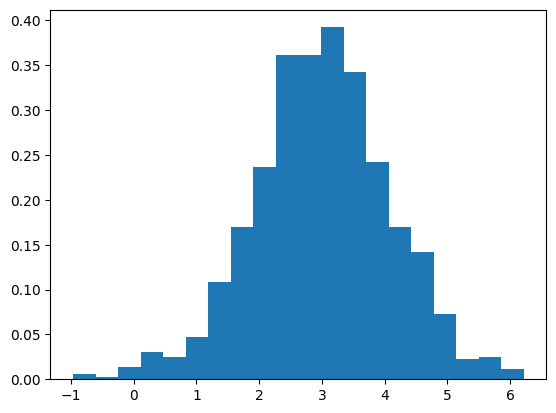

In [6]:
n = 1000
y = np.random.default_rng().standard_t(10, size=n) + 3.0
h = plt.hist(y, bins=20, density=True)

In [7]:
code = '''
data {
  int<lower=0> N;
  vector[N] y;
}

transformed data{
  real y_mean;
  y_mean = mean(y);
}

parameters {
  real alpha;
  real<lower=0> sigma;
}

model {
  alpha ~ normal(y_mean, 10);
  sigma ~ cauchy(0, 5);
  y ~ normal(alpha, sigma);
}
'''

In [8]:
data = {'N':n, 'y':y}
posterior = stan.build(code, data=data, random_seed=1)
fit = posterior.sample(num_chains=4, num_samples=1000)

Building...



Building: 33.3s, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 3.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.34 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_wv9rnik4/model_bgevass3.stan', line 20, column 2 to column 27)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-condition

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


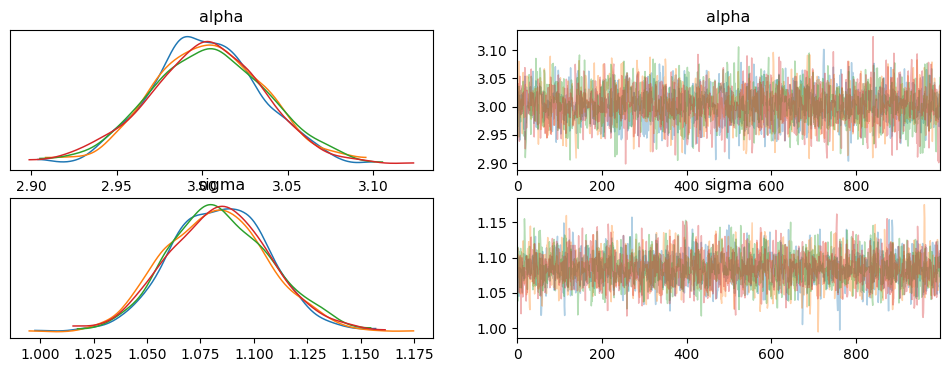

In [9]:
az.plot_trace(fit, compact=False);

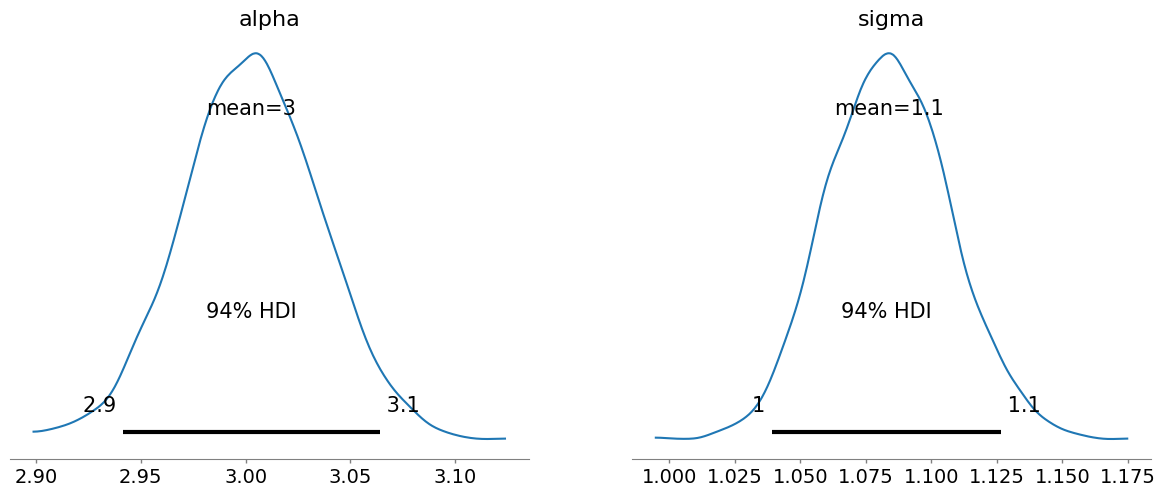

In [10]:
az.plot_posterior(fit, var_names=["alpha", "sigma"]);

to get the posterior samples out...

(array([ 0.3106687 ,  0.46600305,  0.82105299,  1.50896226,  3.57269005,
         4.99288983,  7.56700192, 10.51835457, 11.2728357 , 12.55989174,
        10.91778576,  8.72091423,  6.76813954,  4.26059932,  2.33001525,
         1.35362791,  0.53257491,  0.24409684,  0.02219062,  0.02219062]),
 array([2.89859356, 2.90985958, 2.9211256 , 2.93239162, 2.94365764,
        2.95492366, 2.96618969, 2.97745571, 2.98872173, 2.99998775,
        3.01125377, 3.02251979, 3.03378581, 3.04505183, 3.05631785,
        3.06758387, 3.07884989, 3.09011591, 3.10138193, 3.11264795,
        3.12391397]),
 <BarContainer object of 20 artists>)

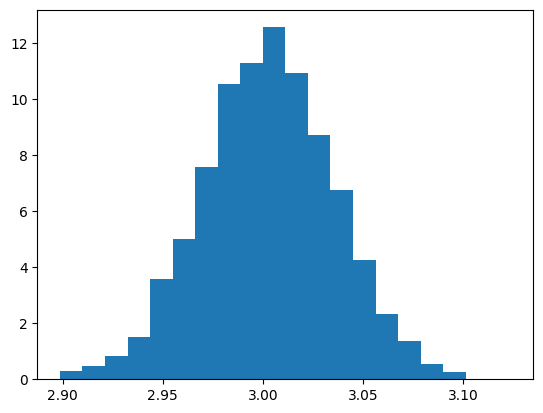

In [11]:
alpha = fit["alpha"]  # array of 4 chains
plt.hist(alpha[0], bins=20, density=True)

and our final inference on alpha is....

In [12]:
np.mean(alpha)

3.002787035549938